## load traffic and climate logs

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

### load logs and print test error

In [25]:
exp='traffic'
time_stamp ="10-19-17-23-29-41"
models =["LSTM","MLSTM","TLSTM"] #'phased_lstm']#
# models=["TALSTM"]
hz_list= [16]
ts_list =[1,4,7,13,19] #[1, 4, 7 , 10 , 13, 16, 19,22, 23]
lr_list =[3]



import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt



def read_config(fstream):
    d = {}
    for line in fstream:
        line.rstrip()
        tokens = line.split('\t')
        for token in tokens:
            try:
                key, val = token.split(":")
                d[key] = float(val)                
            except ValueError:
                'error prop'
    return d

def load_log(run, ts, model):    
    data_path = "/tmp/tensorRNN/log/"+exp+"/"+time_stamp+"/"+model+"/"+ "run-"+str(run)+"/ts-"+ str(ts) +"/"
#     data_path = "/tmp/tensorRNN/log/"+exp+"/"+time_stamp+"/"+model+"/"+ "lr-1e-3"+"/ts-"+ str(ts) +"/"

#     print(data_path)
    f_pred= "predict.npy"
    f_err = "config.out"
    try:
        pred =  np.load(data_path+f_pred )
        with open(data_path+""+f_err,'r') as fstream:
            config = read_config(fstream)
        print(data_path)
        return config, pred
    except FileNotFoundError:
        return None, None

errs = np.ones((len(ts_list),len(models), 2))
i=0
for ts in ts_list:
    j=0
    for model in models: 
        k=0
        for run in range(1,3):
            try:
                config, pred = load_log(run, ts, model)
                print('train error:',config['train_error'],'test err:',config['test_error'])
                errs[i,j,k] =  config['test_error']
            except:
                pass
            k +=1
        j +=1
    i +=1


/tmp/tensorRNN/log/traffic/10-19-17-23-29-41/LSTM/run-1/ts-1/
train error: 0.0692443 test err: 0.0772566
/tmp/tensorRNN/log/traffic/10-19-17-23-29-41/LSTM/run-2/ts-1/
train error: 0.0722582 test err: 0.0770117
/tmp/tensorRNN/log/traffic/10-19-17-23-29-41/MLSTM/run-1/ts-1/
train error: 0.0736263 test err: 0.0738926
/tmp/tensorRNN/log/traffic/10-19-17-23-29-41/MLSTM/run-2/ts-1/
train error: 0.0733379 test err: 0.0755382
/tmp/tensorRNN/log/traffic/10-19-17-23-29-41/TLSTM/run-1/ts-1/
train error: 0.0686616 test err: 0.0745825
/tmp/tensorRNN/log/traffic/10-19-17-23-29-41/TLSTM/run-2/ts-1/
train error: 0.0734762 test err: 0.075471
/tmp/tensorRNN/log/traffic/10-19-17-23-29-41/LSTM/run-1/ts-4/
train error: 0.0842774 test err: 0.0887029
/tmp/tensorRNN/log/traffic/10-19-17-23-29-41/LSTM/run-2/ts-4/
train error: 0.0869122 test err: 0.0865816
/tmp/tensorRNN/log/traffic/10-19-17-23-29-41/MLSTM/run-1/ts-4/
train error: 0.0839691 test err: 0.0871006
/tmp/tensorRNN/log/traffic/10-19-17-23-29-41/MLSTM/

In [89]:
mean_val = np.mean(errs_3runs, axis=2)
var_val = np.std(errs_3runs, axis=2)
print(mean_val)
print(var_val)
errs_3runs = np.load('traffic_3_runs.npy')

[[ 0.07680367  0.0748943   0.07453407]
 [ 0.08868767  0.0861143   0.08472673]
 [ 0.09708223  0.08910667  0.08664827]
 [ 0.09902263  0.0940237   0.0916904 ]
 [ 0.11839033  0.1069409   0.09441663]]
[[ 0.00047795  0.00071787  0.00078552]
 [ 0.00171341  0.00069915  0.00130658]
 [ 0.00103073  0.00051269  0.00209172]
 [ 0.00362257  0.00261823  0.00112865]
 [ 0.00778821  0.01431041  0.00051317]]


### Plot Time Series

/home/qiyu/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


<a list of 11 Text xticklabel objects>


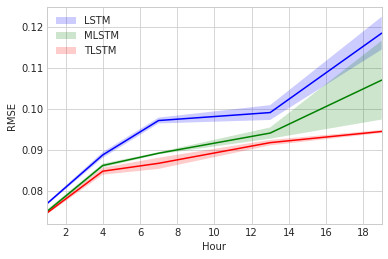

In [87]:
import seaborn as sns
params = {
   'axes.labelsize': 20,
   'font.size': 12,
   'legend.fontsize': 15,
   'xtick.labelsize': 20,
   'ytick.labelsize': 20,
   'text.usetex': False,
    'Figure.figsize':[8,10]
   }
sns.set_style("whitegrid")
sns.despine()
lstm = errs_3runs[:,0,:].T
f1 = sns.tsplot(data=lstm, color='b',time=ts_list)
labels = f1.get_xticklabels() 
print(labels)
for i,l in enumerate(labels):
    labels[i]= i*2
f1.set_xticklabels(labels)

mlstm = errs_3runs[:,1,:].T
sns.tsplot(data=mlstm , color='g',time=ts_list)
tlstm = errs_3runs[:,2,:].T
sns.tsplot(data=tlstm, color='r',time=ts_list )

xs = np.array([ts for ts in ts_list])

plt.legend(['LSTM','MLSTM','TLSTM'])
plt.xlabel('Hour')
plt.ylabel('RMSE')


### Compare different methods

(9, 3)
[[ 0.0761427  0.0752521  0.0735487]
 [ 0.0907785  0.085561   0.0828922]
 [ 0.0985387  0.0885231  0.084865 ]
 [ 0.0956888  0.0895219  0.0912325]
 [ 0.0997028  0.0975014  0.0927951]
 [ 0.123326   0.0938802  0.0954636]
 [ 0.109822   0.0982566  0.0947795]
 [ 0.0987203  0.0966741  0.0984221]
 [ 0.102317   0.121177   0.115179 ]]
[ 1  4  7 13 19]


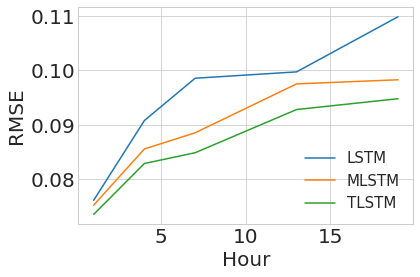

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

params = {
   'axes.labelsize': 20,
   'font.size': 12,
   'legend.fontsize': 15,
   'xtick.labelsize': 20,
   'ytick.labelsize': 20,
   'text.usetex': False,
   }
mpl.rcParams.update(params)
sns.set_style("whitegrid")
sns.despine()
print(errs.shape)

print(errs)
idx = [0,1,2, 4,6] # 1,4,7,13,19

xs = np.array([ts for ts in ts_list])
plt.plot(xs[idx], errs[idx,:])
plt.legend(['LSTM','MLSTM','TLSTM'])
plt.xlabel('Hour')
plt.ylabel('RMSE')

# np.save('./traffic_model_step.npy',errs)

### load test prediction

rmse 0.0947794717437
rmse 0.0982565937981
rmse 0.109821637632


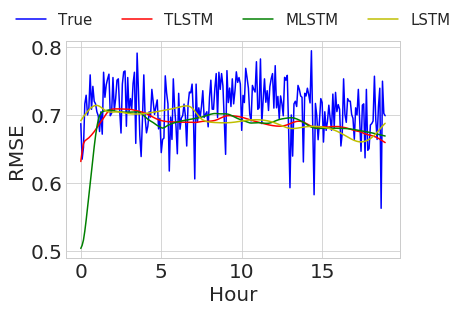

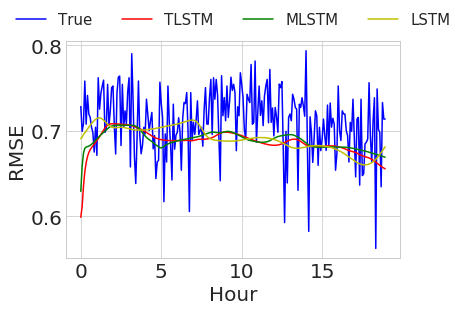

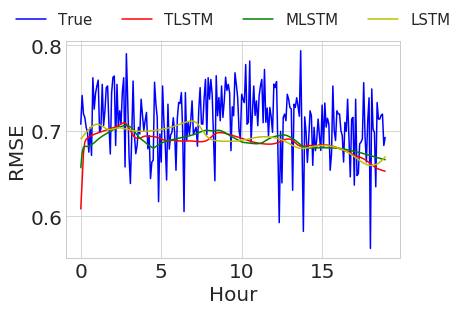

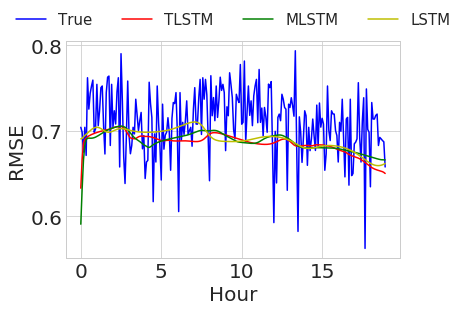

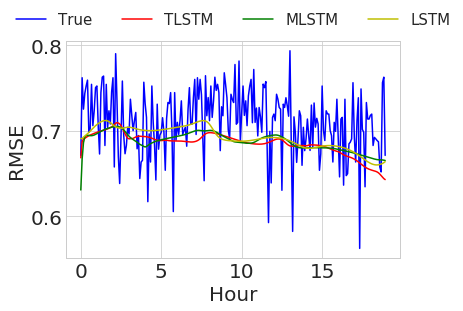

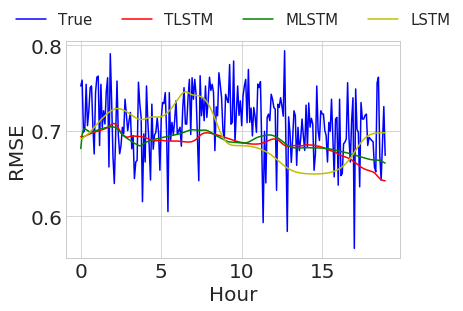

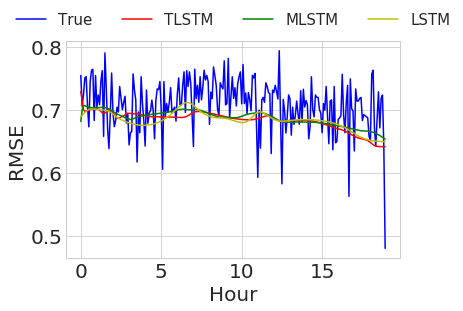

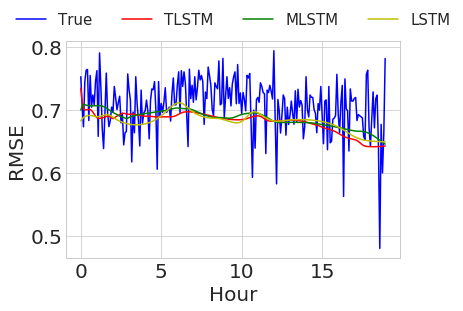

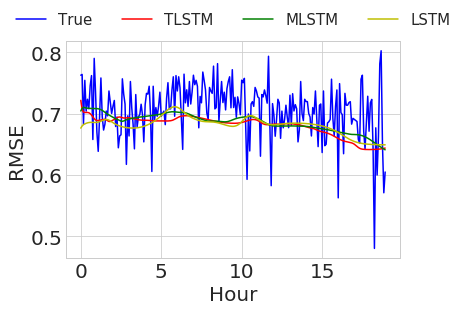

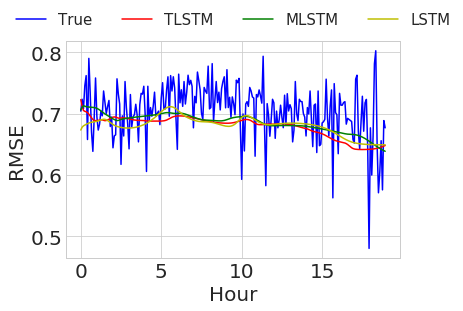

In [42]:
import numpy as np
import sklearn 
from sklearn.metrics import mean_squared_error


def RMSE(y_pred, y_true):
    """RMSE"""
    t1 = np.linalg.norm(y_pred-y_true)**2 / np.size(y_true)
    return np.sqrt(t1)

exp="traffic"

ts= 19

def get_pred(model):
    data_path = "/tmp/tensorRNN/log/"+exp+"/"+time_stamp+"/"+model+"/"+"lr-1e-3"+"/ts-"+ str(ts*12) +"/"
    true, pred = np.load(data_path+'predict.npy')

    diff = (true-pred)**2
    diff = diff.flatten()
    mse = np.sum(diff)/diff.size
    val = np.sqrt(mse)

    print('rmse', val)
    return true,pred

    
true, x1  = get_pred('TLSTM')
_, x2  = get_pred('MLSTM')
_, x3  = get_pred('LSTM')

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt


for i in range(530,540):
    x = np.arange(0,ts*12)/12
    fig = plt.figure()
    ax = fig.gca()
    ax.plot(x, true[i,:,0],'b',label='True')
    ax.plot(x, x1[i,:,0],'r-', label='TLSTM')
    ax.plot(x, x2[i,:,0],'g-',label='MLSTM')
    ax.plot(x, x3[i,:,0],'y-', label='LSTM')

    # ax.legend(['True','TLSTM','MLSTM','LSTM'])
    plt.xlabel('Hour')
    plt.ylabel('RMSE')
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.),
              ncol=4, fancybox=True, shadow=True)

## Load Genz function results

In [8]:
time_stamp ="10-04-17-19-01-04"
exps= ['f1','f2','f3','f4','f5','f6']
models =["LSTM","TLSTM"] #'phased_lstm']#

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def read_config(fstream):
    d = {}
    for line in fstream:
        line.rstrip()
        tokens = line.split('\t')
        for token in tokens:
            try:
                key, val = token.split(":")
                d[key] = float(val)                
            except ValueError:
                'error prop'
    return d

def load_log(exp, model):
    data_path = "/var/tmp/tensorRNN/log/"+exp+"/10-04-17-19-02-07/genz"+exp+"/"+model+"/"
    print(data_path)
    f_pred= "predict.npy"
    f_err = "config.out"
    pred =  np.load(data_path+f_pred )
    with open(data_path+""+f_err,'r') as fstream:
        config = read_config(fstream)
    return config, pred

errs = np.ones((len(exps), len(models)))
i=0
for exp in exps:
    j=0
    for model in models:
        try:
            config, pred = load_log(exp, model)
            print('train error:',config['train_error'],'test err:',config['test_error'])
            errs[i,j] =  config['test_error']
        except FileNotFoundError:
            print('not found')
            
        j +=1
    i +=1


/var/tmp/tensorRNN/log/f1/10-04-17-19-02-07/genz/f1/LSTM/
not found
/var/tmp/tensorRNN/log/f1/10-04-17-19-02-07/genz/f1/TLSTM/
not found
/var/tmp/tensorRNN/log/f2/10-04-17-19-02-07/genz/f2/LSTM/
not found
/var/tmp/tensorRNN/log/f2/10-04-17-19-02-07/genz/f2/TLSTM/
not found
/var/tmp/tensorRNN/log/f3/10-04-17-19-02-07/genz/f3/LSTM/
not found
/var/tmp/tensorRNN/log/f3/10-04-17-19-02-07/genz/f3/TLSTM/
not found
/var/tmp/tensorRNN/log/f4/10-04-17-19-02-07/genz/f4/LSTM/
not found
/var/tmp/tensorRNN/log/f4/10-04-17-19-02-07/genz/f4/TLSTM/
not found
/var/tmp/tensorRNN/log/f5/10-04-17-19-02-07/genz/f5/LSTM/
not found
/var/tmp/tensorRNN/log/f5/10-04-17-19-02-07/genz/f5/TLSTM/
not found
/var/tmp/tensorRNN/log/f6/10-04-17-19-02-07/genz/f6/LSTM/
not found
/var/tmp/tensorRNN/log/f6/10-04-17-19-02-07/genz/f6/TLSTM/
not found


(10000, 100, 1)
(1000, 95, 1)
0.0


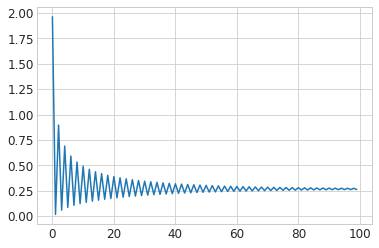

In [44]:
# raw data
exp='f3'
dat = np.load('/home/qiyu/data/'+exp+'.npy')
print(dat.shape)
plt.plot(dat[4486,:,0])
print(true.shape)
print(np.argmax(true[:,:,0])/true.shape[1])

/tmp/tensorRNN/log/genz/f1/10-11-17-22-19-29//LSTM/
/tmp/tensorRNN/log/genz/f1/10-11-17-22-19-29//LSTM/
train error: 0.264994 test err: 0.256996
/tmp/tensorRNN/log/genz/f1/10-11-17-22-19-29//TALSTM/
train error: 0.380975 test err: 0.381085


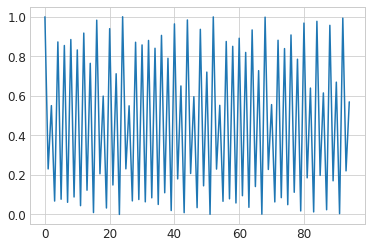

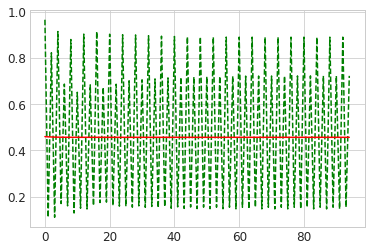

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
# plotting configuration
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
params = {
   'axes.labelsize': 20,
   'font.size': 20,
   'legend.fontsize': 20,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   }
mpl.rcParams.update(params)
sns.set_style("whitegrid")
sns.despine()

time_stamp ="10-11-17-22-19-29/"
def load_log(exp, model):
    data_path = "/tmp/tensorRNN/log/genz/"+exp+"/"+time_stamp+"/"+model+"/"
    print(data_path)
    f_pred= "predict.npy"
    f_err = "config.out"
    pred =  np.load(data_path+f_pred )
    with open(data_path+""+f_err,'r') as fstream:
        config = read_config(fstream)
    return config, pred

exp = 'f1'

i= 0


model = 'LSTM'
data_path = "/tmp/tensorRNN/log/genz/"+exp+"/"+time_stamp+"/"+model+"/"
print(data_path)
config, pred = load_log(exp, model)
print('train error:',config['train_error'],'test err:',config['test_error'])
true, pred = np.load(data_path+'predict.npy')
plt.figure()
plt.plot(true[i,:,0])

plt.figure()
plt.plot(pred[i,:,0],'g--',label=model)
model = 'TALSTM'
config, pred = load_log(exp, model)

data_path = "/tmp/tensorRNN/log/genz/"+exp+"/"+ time_stamp +"/"+model+"/"
true, pred = np.load(data_path+'predict.npy')

print('train error:',config['train_error'],'test err:',config['test_error'])

plt.plot(pred[i,:,0],'r-',label=model)
